In [4]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Loading data from CSV into dataframe
job_data_df = pd.read_csv("../Resources/jobs_in_data.csv")

In [6]:
# Printing first 5 rows
job_data_df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [7]:
# Defining variable to store value of company name which will be considered during filtering 
country_name = 'United States'

In [8]:
# Filter data for a specific country
reduced_df_by_country = job_data_df[(job_data_df['company_location'] == country_name)]
reduced_df_by_country.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M


In [191]:
# Group by size of the company, experience level
grouped_by_company_size_experience_level_df = reduced_df_by_country[['salary_in_usd', 'company_size','experience_level']].groupby(['company_size','experience_level'])
# Take average pay of employees by company size and also experience level
mean_df = grouped_by_company_size_experience_level_df.mean()
# Reformatting salary_in_usd to make sure we only upto cents precision
mean_df

salary_in_usd
company_size experience_level               
L            Entry-level       103209.306122
             Executive         242048.444444
             Mid-level         145119.885417
             Senior            172673.888060
M            Entry-level       104379.806569
             Executive         192918.004292
             Mid-level         128905.978774
             Senior            165855.301396
S            Entry-level        83746.200000
             Executive         249000.000000
             Mid-level         105881.238095
             Senior            127318.181818

<Axes: xlabel='company_size,experience_level', ylabel='Salary in USD'>

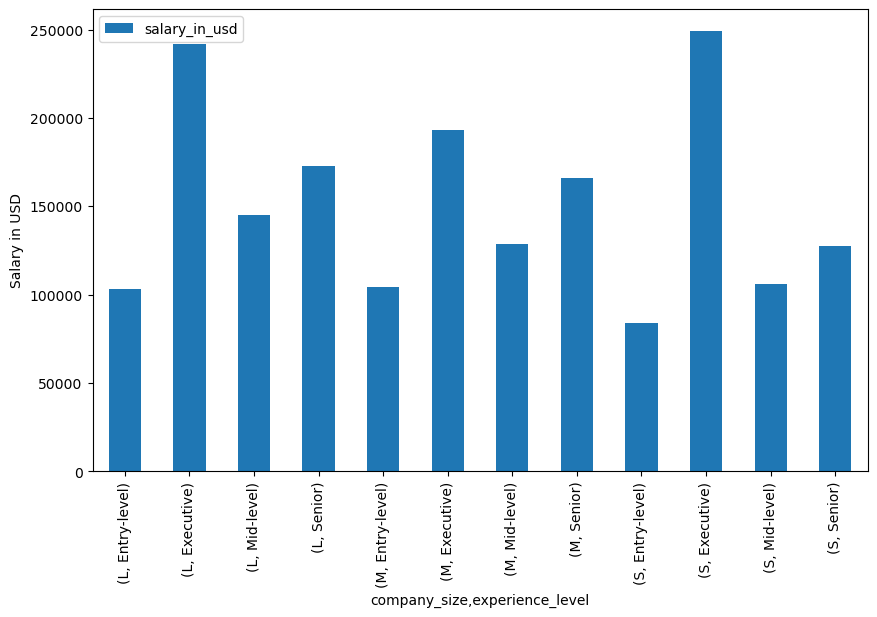

In [192]:
mean_df.plot(kind='bar', figsize=(10,6), ylabel='Salary in USD')

In [198]:
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('L', 'Entry-level') to ('S', 'Senior')
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salary_in_usd  12 non-null     float64
dtypes: float64(1)
memory usage: 302.0+ bytes


In [199]:
grouped_by_work_setting = reduced_df_by_country[['salary_in_usd','work_setting', 'experience_level']].groupby(['work_setting', 'experience_level'])
average_salary_by_work_setting = grouped_by_work_setting.mean()
average_salary_by_work_setting

salary_in_usd
work_setting experience_level               
Hybrid       Entry-level        93243.047619
             Mid-level         163500.000000
             Senior            183454.545455
In-person    Entry-level       112381.229592
             Executive         184305.482517
             Mid-level         133667.806660
             Senior            168922.274801
Remote       Entry-level        90058.904762
             Executive         211346.087379
             Mid-level         120441.013453
             Senior            161276.978591

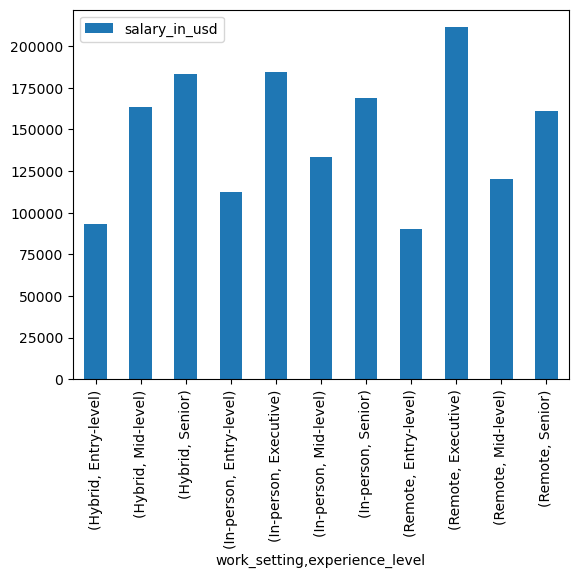

In [200]:
average_salary_by_work_setting.plot(kind='bar')
plt.show()

In [201]:
job_data_df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [211]:
group_by_job_category = job_data_df[['job_category', 'salary_in_usd']].groupby('job_category')
average_pay_by_job_category = group_by_job_category.mean()

<Axes: xlabel='Job Category', ylabel='Salary in USD'>

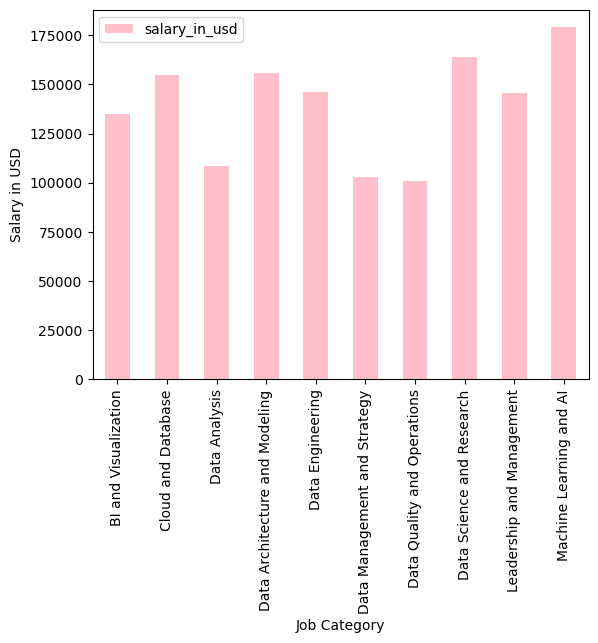

In [219]:
average_pay_by_job_category.plot(kind='bar', color='pink', xlabel='Job Category' ,ylabel='Salary in USD')